Test for quantum neural lattice update step

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import lines
import seaborn as sns; sns.set()
np.random.seed(seed=1)
PI=3.141
PPI=2*PI
TWO_PI = PPI

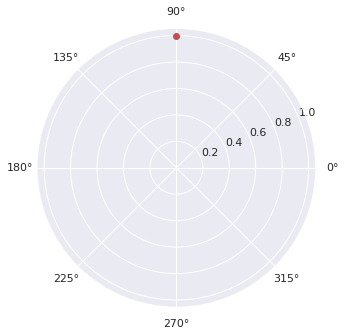

In [24]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np


xs = np.arange(7)
ys = xs**2

fig = plt.figure(figsize=(5, 10))

# offset_copy works for polar plots also.
ax = plt.subplot(1, 1, 1, projection='polar')

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

#for x, y in zip(xs, ys):
plt.polar(PI/2, 1, 'ro')#, 'ro')
#    plt.text(x, y, '%d, %d' % (int(x), int(y)),
#             transform=trans_offset,
#             horizontalalignment='center',
#             verticalalignment='bottom')

plt.show()

In [64]:
# test

inpshape=(3,2)
qnl_shape=(2,2)
exc_inp=np.random.random(inpshape)
qnl_activity=np.random.random(qnl_shape)

exc_inp_phase=PPI*np.random.random(inpshape)
qnl_phase=PPI*np.random.random(qnl_shape)

topology=np.zeros(shape=inpshape)
topology[0,0]=1
topology[1,0]=1
topology[2,1]=1

qnl_phase_repl = np.repeat(qnl_phase, inpshape[0], axis=0)

input_phase_repl = np.tile(exc_inp_phase, (qnl_shape[0],1))

top_ravel =  np.ravel(topology, order='F')
top_ravel = top_ravel[:, np.newaxis]

phase_diff = input_phase_repl - qnl_phase_repl

'''
print('orig')
print (qnl_activity)
print('repl')
print (qnl_phase_repl)
print("inp phase_repl")
print(input_phase_repl)
print('top')
print (top_ravel)
print('diff')
print(phase_diff)
'''
phase_diff = top_ravel*phase_diff
print('diff*topology')
print(phase_diff)

# multiply phase diff with activity
input_phase_diff = phase_diff*np.tile(exc_inp, (2,1))
print('inp exc * phase diff')
print(input_phase_diff)
print(input_phase_diff.shape)
input_phase_diff = np.append(input_phase_diff[0:3,:], input_phase_diff[3:,:], axis=1)

phase_delta = np.sum(input_phase_diff, axis=0)

# TODO activity delta: input*cos(phase_diff)


diff*topology
[[ 0.88631135  4.34248171]
 [ 1.1994462   2.42537844]
 [-0.         -0.        ]
 [-0.          0.        ]
 [-0.          0.        ]
 [-4.02128539 -0.71240081]]
inp exc * phase diff
[[ 0.77995247  3.92491716]
 [ 0.79489676  0.65535729]
 [-0.         -0.        ]
 [-0.          0.        ]
 [-0.          0.        ]
 [-1.01483853 -0.60902998]]
(6, 2)


array([ 1.57484923,  4.58027445, -1.01483853, -0.60902998])

In [ ]:
class QNL:
  def __init__(self, 
    size=2, 
    max_freq=12, 
    resolution=2,
    ):
    self.size = size
    self.max_freq = max_freq
    self.resolution = resolution
    self.phase = np.zeros(shape=(size, resolution))
    self.activity = np.zeros(shape=(size, resolution))

In [ ]:
def qnl_tick(exc_in, inh_in):
    # compute power for each freq band dept on input excitation
    # and inhibition, and phase difference - use topology
    # to determine which inputs belong to which units

    # update current phase, by adding phasedifference weighted
    # by frequency band activity

    # update current pohase by adding freq delta
    # based on (maxfreq/resolution) for each band

In [7]:
def max_upw_potential(i, x):
    '''Returns max upward ladder potential'''
    if i==0: 
        print('ret at 0: ' + str(x[0]))
        return x[0]
    else:
        retval = max(0, x[i] + (max(0, max_upw_potential(i-1, x)-1)))
        print('ret at ' + str(i) + ': ' + str(retval) )
        return retval

def calcdelta(tst):
    # print (max_upw_potential(sz-2, tst))
    delta = np.zeros(sz)
    for i in reversed(range(sz)):
        if i==sz-1:
            delta[i] = min(max_upw_potential(i-1, tst)+tst[i], 1)
        if tst[i] < 0:
            tst[i-1] += tst[i]
            delta[i] = 0
        else: delta[i] = tst[i]
        # print (str(i) + ': ' + str(delta[i]))
    return delta


In [8]:
sz = 4
mx = 3
# tst = mx * np.random.random(sz)-mx/2
tst = [1.2, 0, 0, 0]
print(tst)
print

print(calcdelta(tst))

[1.2, 0, 0, 0]
ret at 0: 1.2
ret at 1: 0.19999999999999996
ret at 2: 0
[1.2 0.  0.  0. ]


In [5]:
def getPhaseDiff(a, b):
    retval = abs(a-b)
    if retval > PI:
        retval = TWO_PI-a + b
    return retval

In [6]:
print(getPhaseDiff(1.5*PI, 0.5*PI))
print(getPhaseDiff(1.75*PI, 0.25*PI))
print(getPhaseDiff(0.5*PI, 1.5*PI))

3.141
1.5704999999999996
3.141


In [7]:
from itertools import permutations

In [9]:
lst=[-1.3, -0.5, 0.5, 1.5]
res = list(permutations(lst, 2))
res

[(-1.3, -0.5),
 (-1.3, 0.5),
 (-1.3, 1.5),
 (-0.5, -1.3),
 (-0.5, 0.5),
 (-0.5, 1.5),
 (0.5, -1.3),
 (0.5, -0.5),
 (0.5, 1.5),
 (1.5, -1.3),
 (1.5, -0.5),
 (1.5, 0.5)]

* (-1.5, -0.5), -> (0, 0)
* (-1.5, 0.5), -> (0, 0.5)
* (-1.5, 1.5), -> (0, 1)
* (-0.5, -1.5), -> (0, 0)
* (-0.5, 0.5), -> (0, 0.5)
* (-0.5, 1.5), -> (0, 1)
* (0.5, -1.5), -> (0, 0)
* (0.5, -0.5), -> (0, 0)
* (0.5, 1.5), -> (0.5, 1)
* (1.5, -1.5), -> ei(0, 0) or ie(0, 0) # if annihilate remainder when exciting n level
* (1.5, -0.5), -> ei(0, 0) or ie(1, 0)*
* (1.5, 0.5)] -> (0, 1)
 
asymmetric 
* (-1.3, -0.5), -> (0, 0)
* (-1.3, 0.5), -> (0, 0.5)
* (-1.3, 1.5),
* (-0.5, -1.3),
* (-0.5, 0.5),
* (-0.5, 1.5),
* (0.5, -1.3),
* (0.5, -0.5),
* (0.5, 1.5),
* (1.5, -1.3), -> ei(0, 0) or ie(0.2, 0)
* (1.5, -0.3), -> ei(0, 0.2) or ie(0, 0.2)
* (1.5, 0.5) -> ei(0, 1)